In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the MNIST dataset
(train_img, train_labels), (test_img, test_labels) = datasets.mnist.load_data()
train_img, test_img = train_img / 255.0, test_img / 255.0

11490434/11490434 [==============================] - 4s 0us/step


In [4]:
# Create a convolutional neural network (CNN) model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer with 10 units for 0-9 digits
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_img.reshape(-1, 28, 28, 1), train_labels, epochs=10,
                    validation_data=(test_img.reshape(-1, 28, 28, 1), test_labels))


Epoch 1/10
1875/1875 [==============================] - 28s 14ms/step - loss: 0.1448 - accuracy: 0.9553 - val_loss: 0.0424 - val_accuracy: 0.9866
Epoch 2/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0331 - val_accuracy: 0.9886
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.0337 - val_accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0253 - val_accuracy: 0.9915
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0131 - accuracy: 0.9958 - val_loss: 0.0297 -

In [7]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_img.reshape(-1, 28, 28, 1), test_labels, verbose=2)
print("\nTest accuracy:", test_accuracy)

313/313 - 2s - loss: 0.0329 - accuracy: 0.9919 - 2s/epoch - 5ms/step

Test accuracy: 0.9919000267982483


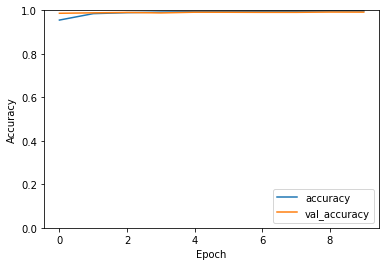

In [8]:
# Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()